## <span style="color:blue">**Keggle 타이타닉 EDA 및 예측**</span>

In [20]:
#데이터 분석을 위한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#그래프나 이미지 등이 출력되는 위치를 설정하는 IPython Magic 명령

In [21]:
#데이터 불러오기
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#null값 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### "나이(Age), 객실(Cabin), 그리고 탑승선(Embarked) 열에 null 값이 포함되어 있음을 알 수 있다."

### 얼마나 살아남았는지에 대한 데이터 시각화

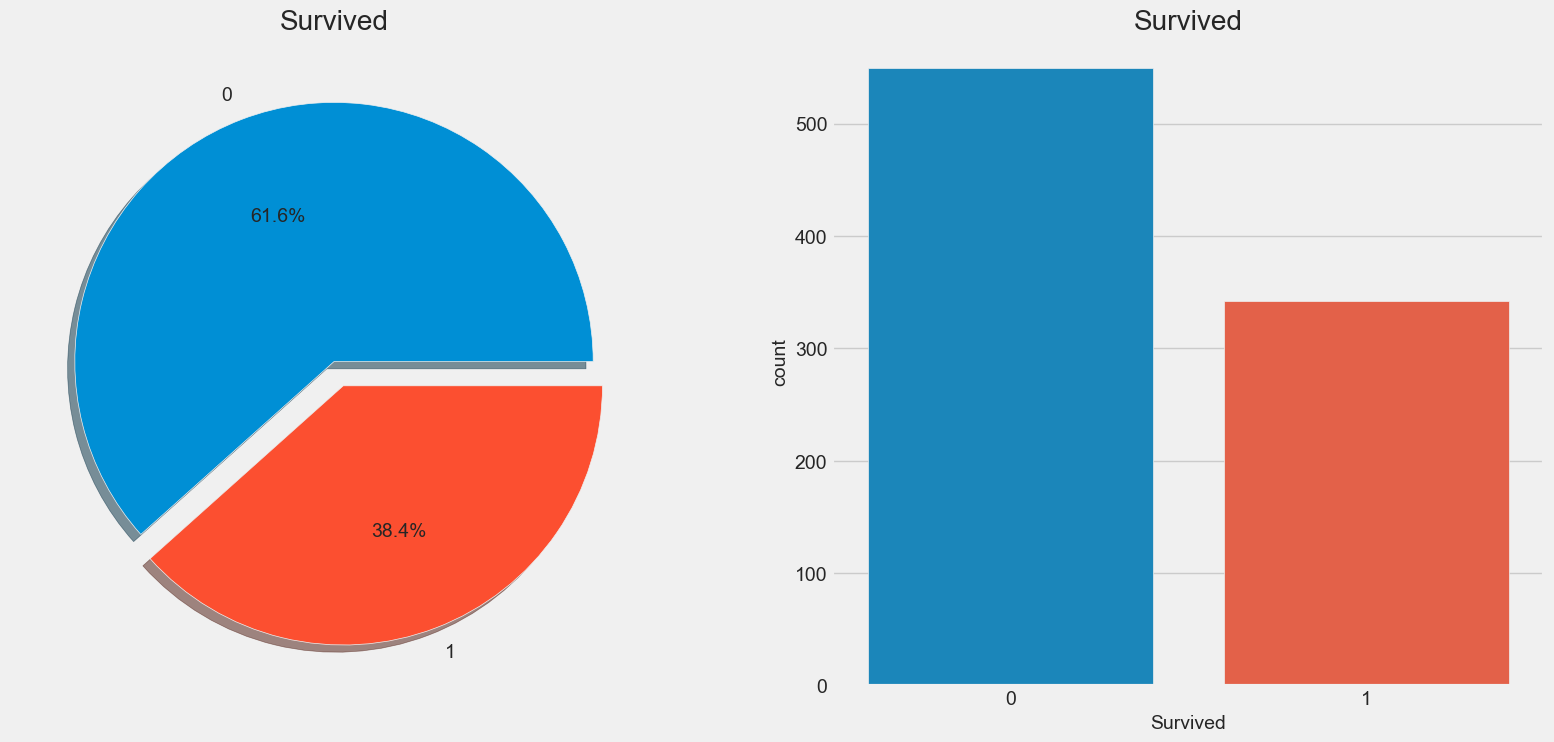

In [23]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
#f는 그래프의 크기를 결정하는 변수
#ax는 그래프의 위치를 결정하는 변수
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# explode=[0, 0.1]: 파이차트의 각 부분이 원에서 돌출되는 정도를 결정하는 인자입니다.
# 첫 번째 부분은 원에서 돌출되지 않고, 두 번째 부분은 0.1 만큼 돌출되도록 설정한 것입니다.
# autopct='%1.1f%%': 파이차트의 각 부분이 차지하는 비율을 표시하는 옵션입니다.
# '%1.1f%%'는 비율을 소수점 첫 자리까지 표시하는 것을 의미합니다.
# ax=ax[0]: 두 개의 그래프를 그리기 위해 사용하는 인자입니다. 첫 번째 그래프를 그리는
# 'ax[0]'와 두 번째 그래프를 그리는 'ax[1]'이 있습니다.
# shadow=True: 파이차트의 그림자를 표현하는 인자입니다.
# data['Survived'].value_counts(): 'Survived' 열의 데이터 값을 세고
#  결과를 다시 'DataFrame.plot.pie()' 메서드를 사용해 파이차트로 그리는 것입니다.
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 약 350명, 38.4%의 사람들만 살아남았다.

### 성별에 따른 생존자 수

In [26]:
# sex -> categorical feature
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

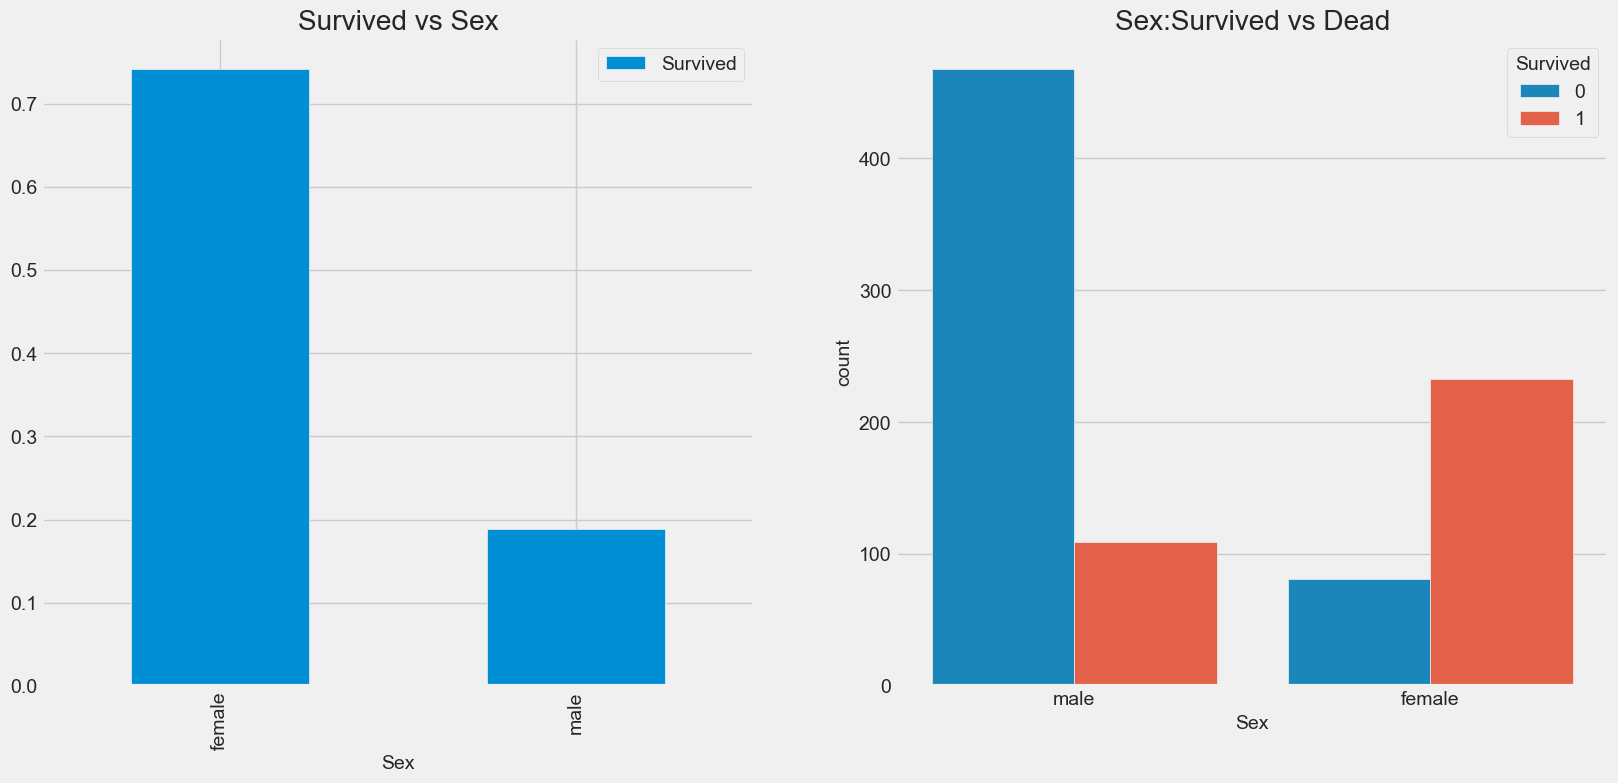

In [28]:
# 성별 생존자 수 시각화
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### 여성의 생존율이 남성의 생존율보다 높다.

In [29]:
# Pclass'(객실 등급)와 'Survived'(생존 여부)를 기준으로 교차표(crosstab) 생성
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


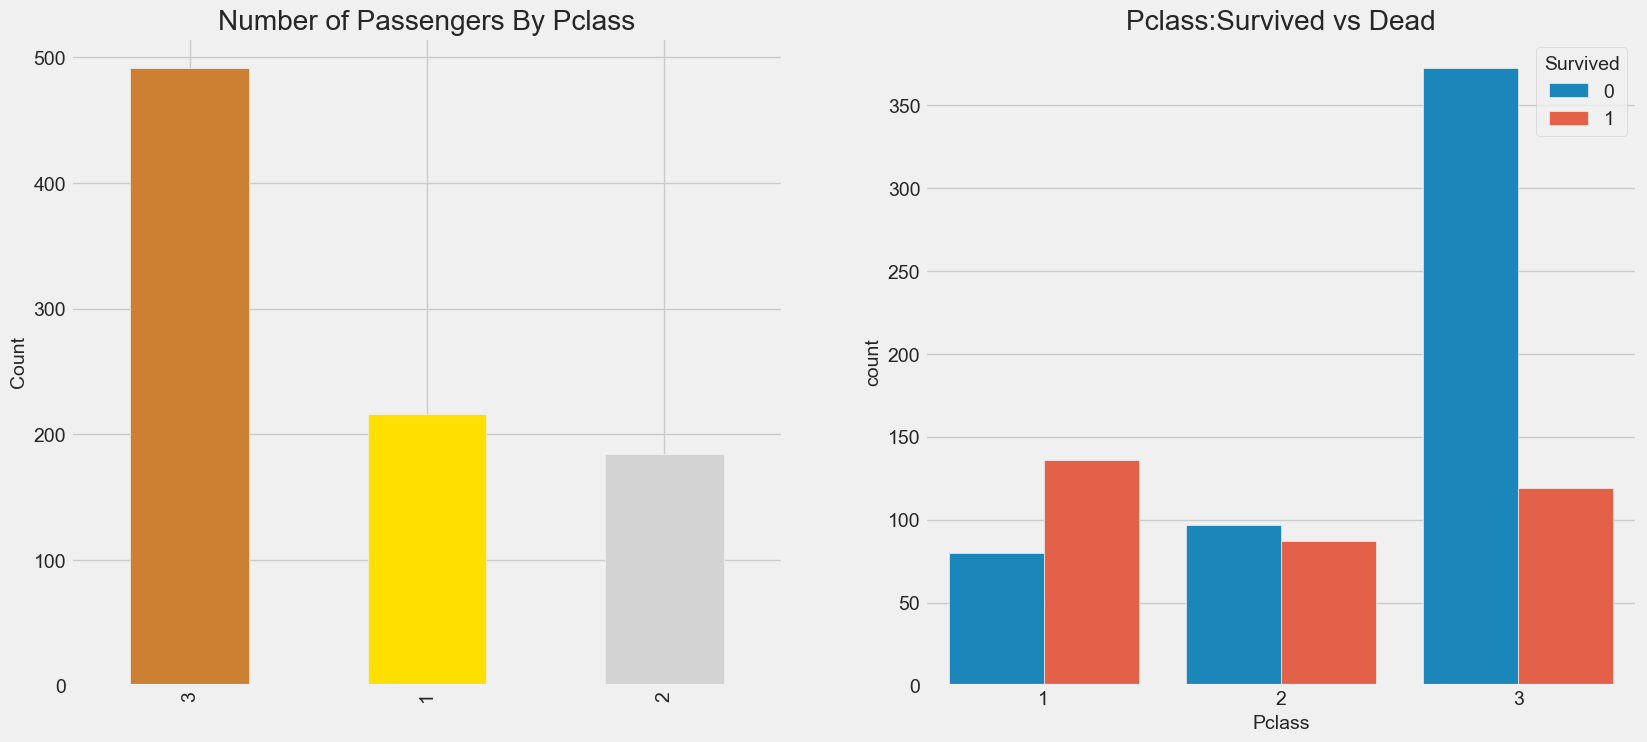

In [31]:
# 객실 등급별 생존율 시각화
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### 1등급 객실의 생존율이 높다.

In [32]:
# 성별과 객실 등급에 따른 생존율 시각화
# crosstab
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

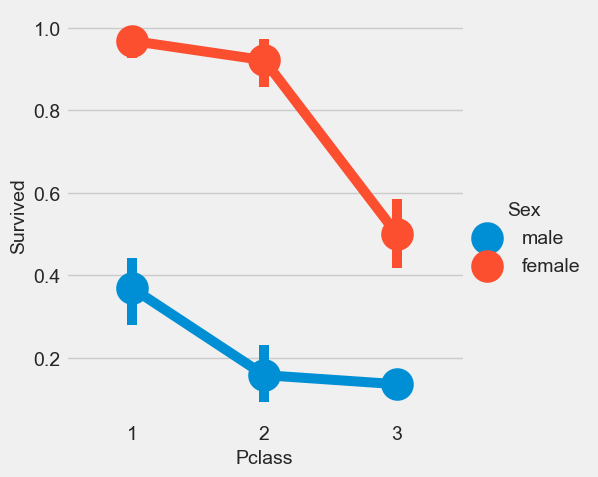

In [36]:
# 성별과 객실 등급에 따른 생존율 시각화
# factorplot
# sns.factorplot('Pclass','Survived',hue = 'Sex', data=data)
# 오류 발생
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
#'Seaborn' 라이브러리에 'factorplot' 함수는 버전 0.9.0부터 'catplot'으로 변경됨
plt.show()

## 1등급 객실의 여성 생존율이 가장 높다.

In [40]:
# 나이(Age) 연속형 변수
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(data['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(data['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(data['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


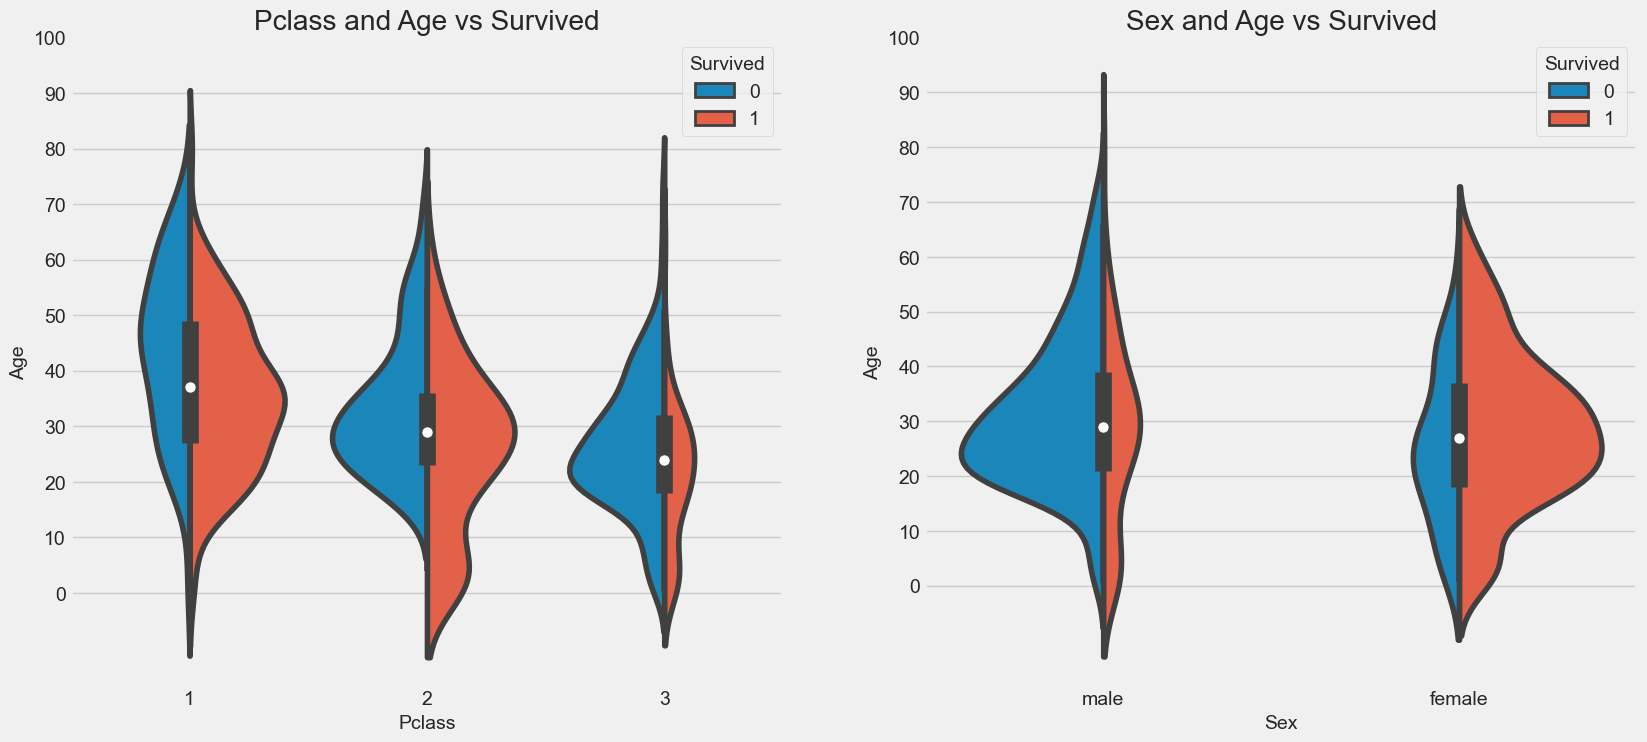

In [43]:
# 객실등급과 나이 생존율, 성멸과 나이 생존율 시각화
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 1. 1,2등급의 경우 10세 이하 어린이 생존율 높음
### 2. 20~50세의 경우 1등급 생존율 높고 여성들의 생존율이 높음
### 3. 남성의 경우 나이가 증가할수록 생존율이 낮아짐

In [44]:
# Name 변수의 특징은 호칭(Title)을 사용하는 것이다. 'Mr', 'Mrs'등의 호칭이 있음
# 이를 기반으로 'Mr', 'Mrs'의 평균나이를 null값에 넣어준다.
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
#Name 변수에서 각 승객의 호칭(salutation)을 추출하여 'Initial' 변수에 할당
# 호칭은 '.'으로 끝나는 알파벳 문자열로 추출되며, 대소문자 모두 처리하기 위해 [A-Za-z]+ 구문을 사용

In [45]:
# 호칭의 빈도수 확인
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')
# .T는 'transpose'의 약어로, 데이터프레임(DataFrame)에서 행과 열을 바꾸어 놓은
# Transpose된 형태의 데이터프레임을 반환하는 역할을 합니다

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [46]:
# 잘못적은 호칭을 replace로 수정
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [47]:
# 호칭별 나이 평균
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [48]:
# 나이 NaN 값을 평균값으로 대체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 46

In [49]:
# Null값이 있는지 확인
data.Age.isnull().any()

False

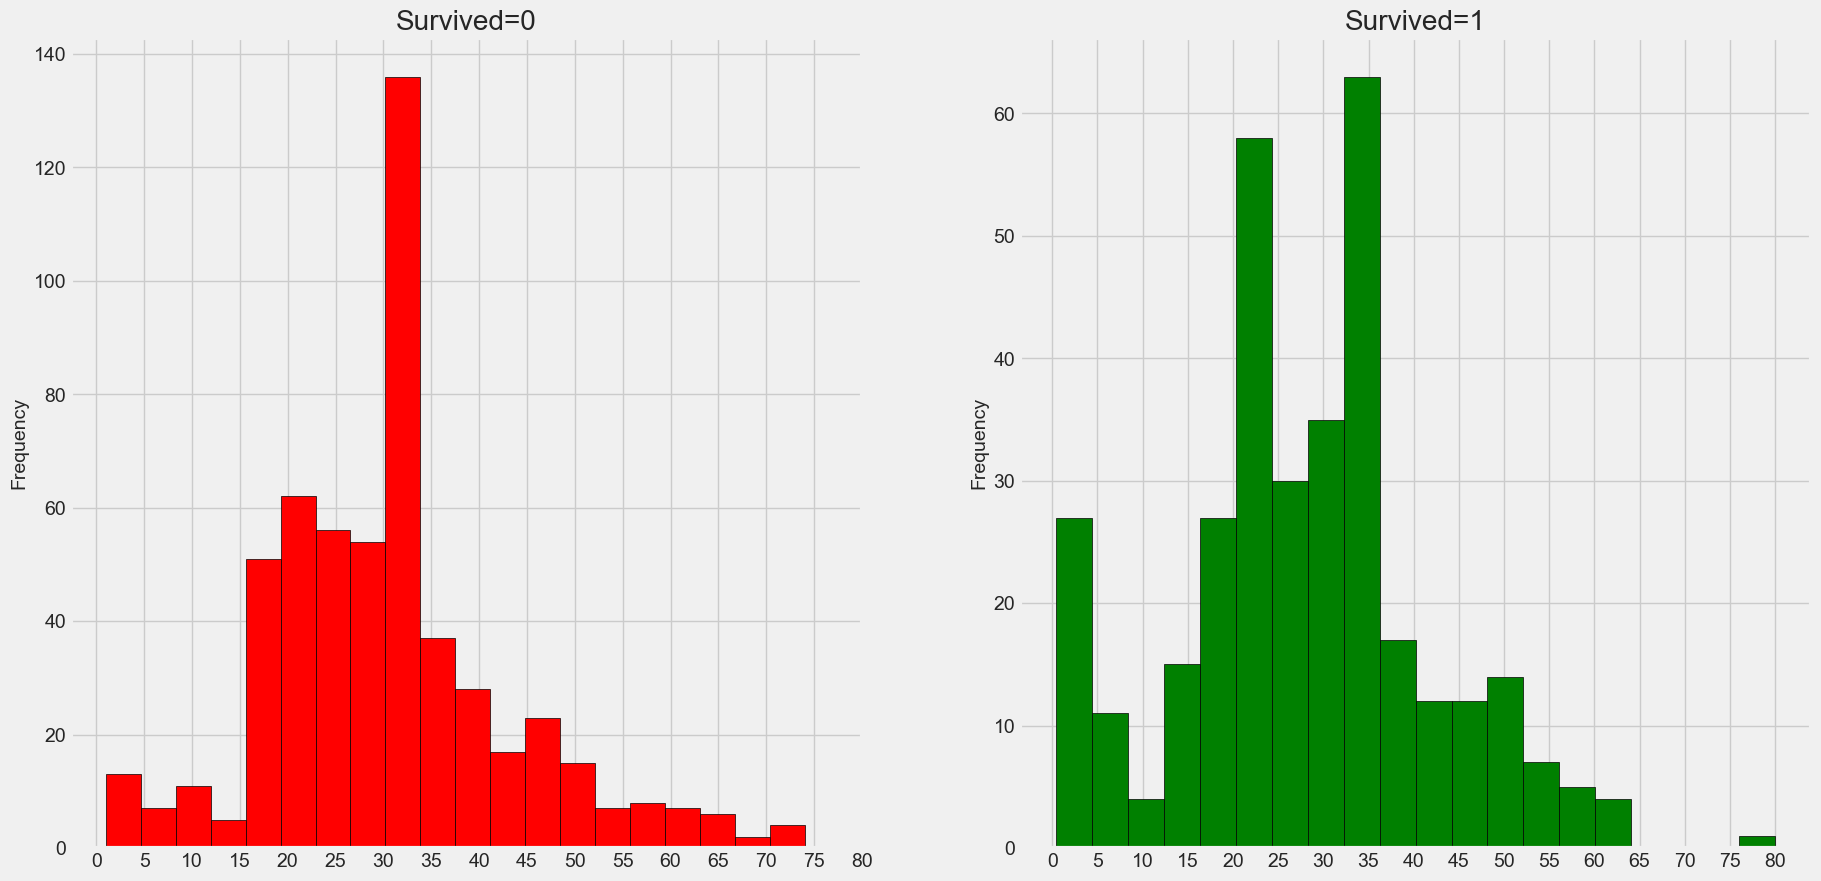

In [50]:
# 나이대별 생존율 시각화
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

### 1. 5세 이하의 생존율이 높은데 여성과 어린이를 우선적으로 구조하는 정책으로 인해 그런 것으로 보임
### 2. 가장 나이 많은 80 대 승객도 생존함
### 3. 30~40대의 사망자가 많음

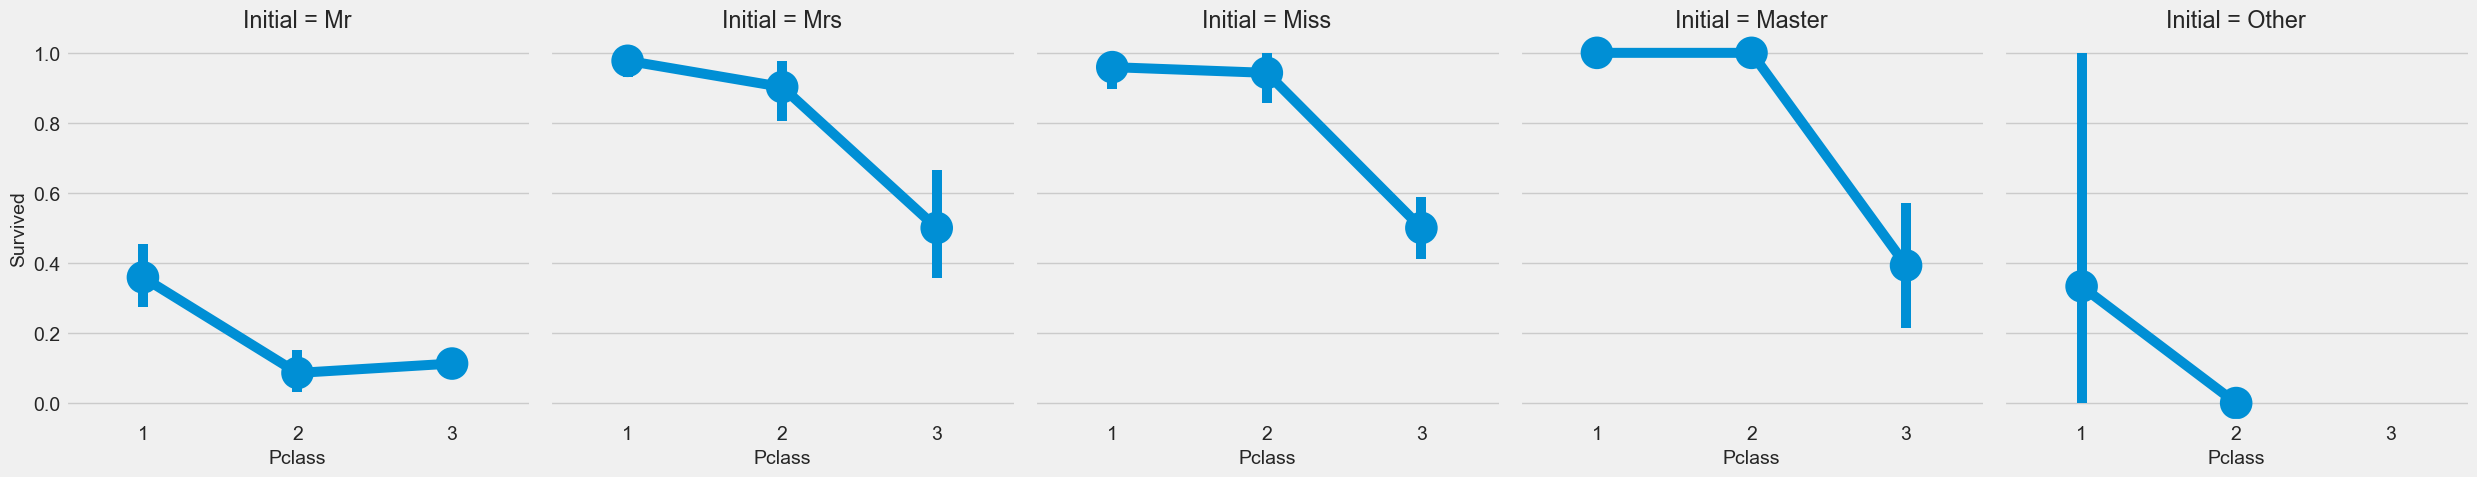

In [55]:
# 호칭별 객실등급에 따른 생존율
g = sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
g.set_axis_labels('Pclass', 'Survived')

### 여성과 어린이의 생존율이 높은 것을 확인할 수 있음

In [58]:
# Embarked(승선한 항구) 변수는 범주형 변수임
# 탑승객은 3개의 항구에서 승선하였으며 각 항구는 S, C, Q로 표기됨
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

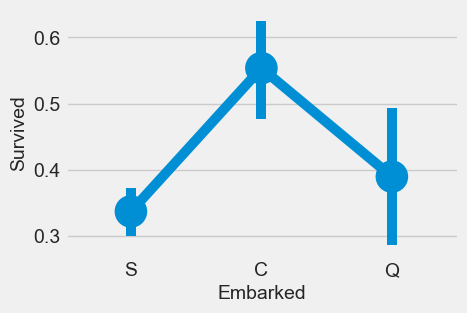

In [62]:
## 승선한 항구에 따른 생존율
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

## 승선한 항구 C의 생존 확률은 약 0.55로 가장 높으며, 항구 S의 경우 가장 낮음

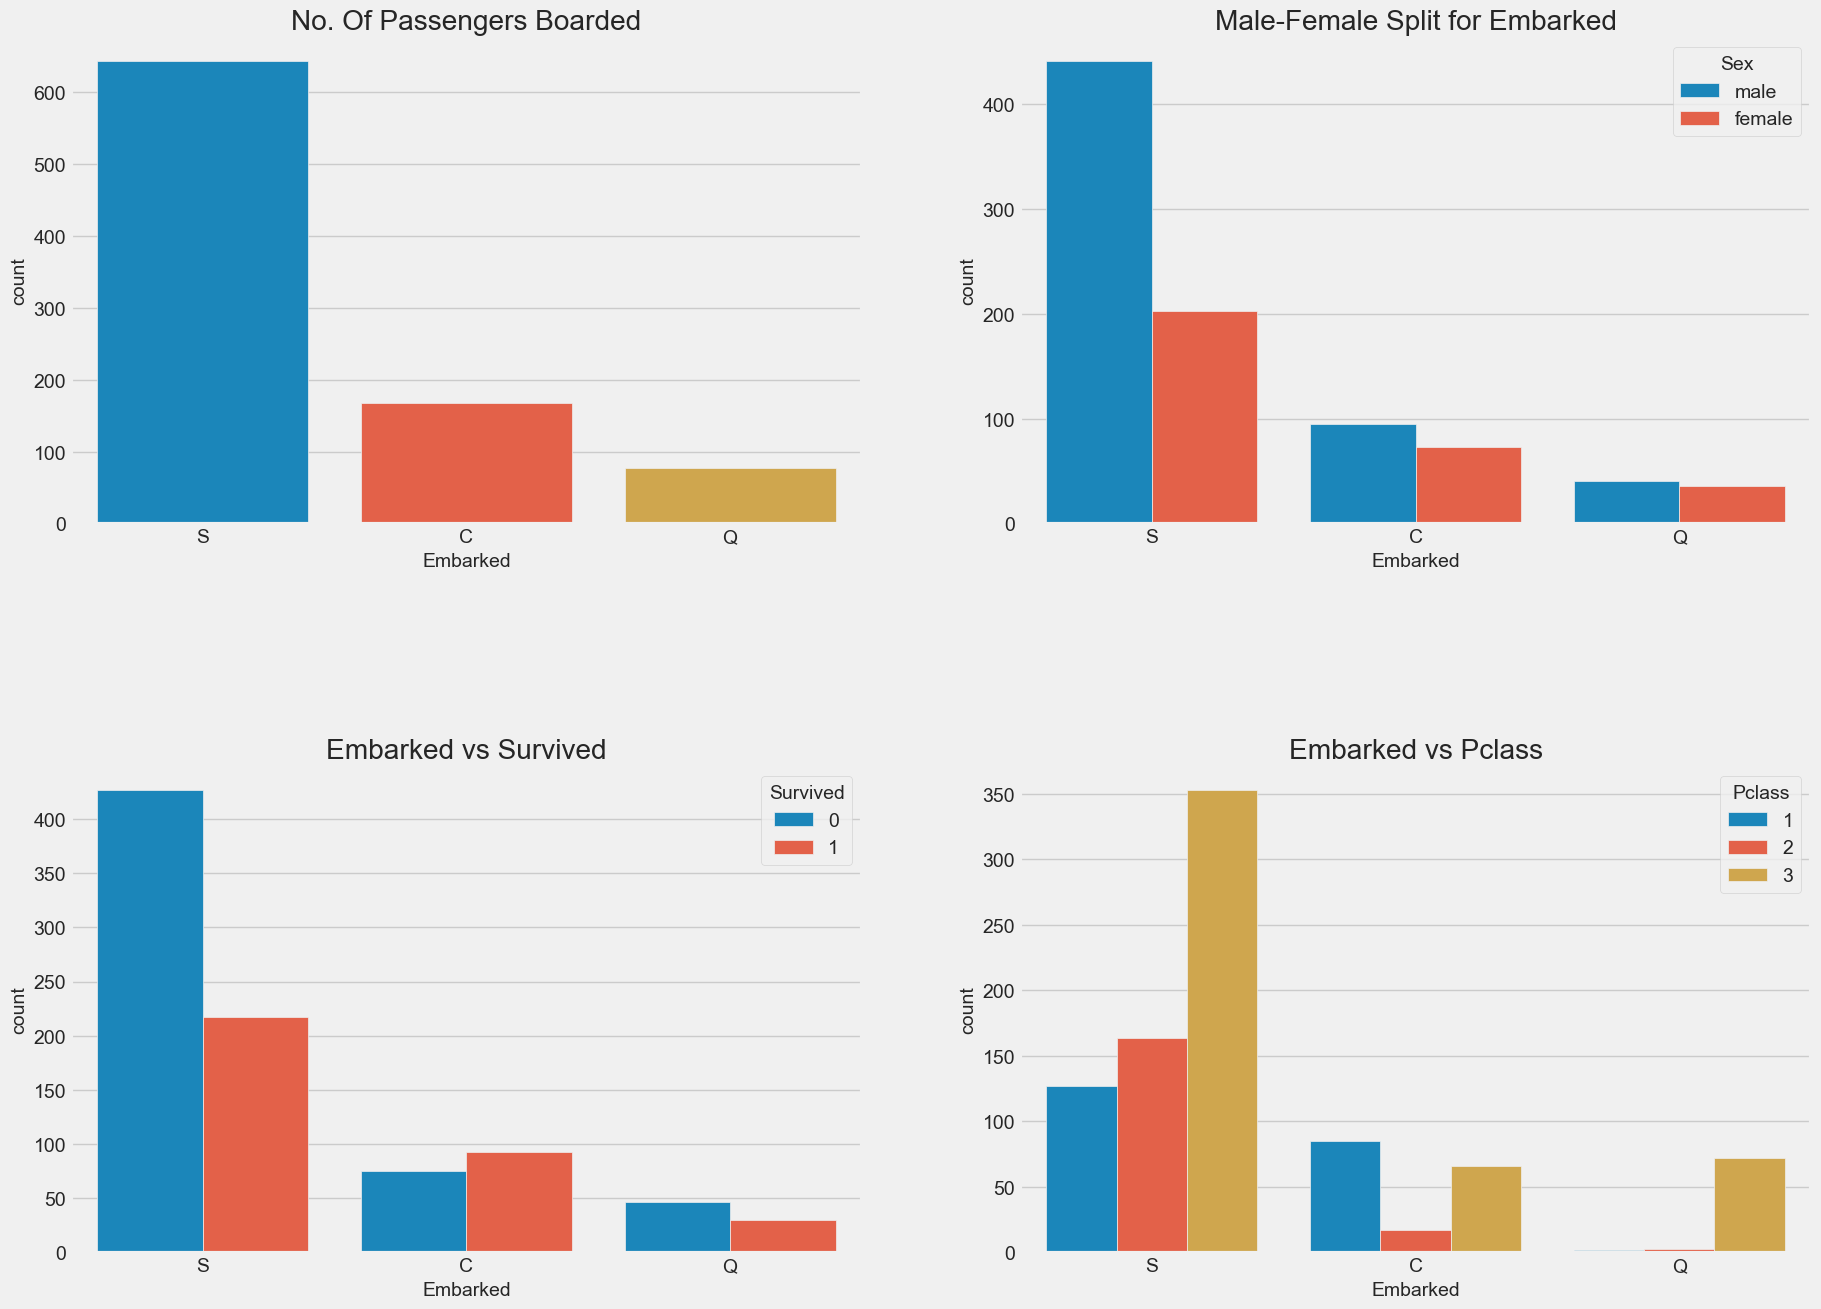

In [66]:
# 승선한 항구별 통계
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex', data=data, ax=ax[0, 1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 1. 항구 S에서 가장 많은 승객이 탑승함
### 2. 항구 C의 생존율이 높은 이유는 1등급과 2등급 승객들이 모두 구조되었을 가능성이 있음
### 3. 항구 S의 생존율이 낮은 이유는 3등급 승객들 중 81%가 사망했기 때문임
### 4. Q항구의 95%가 3등급 승객임

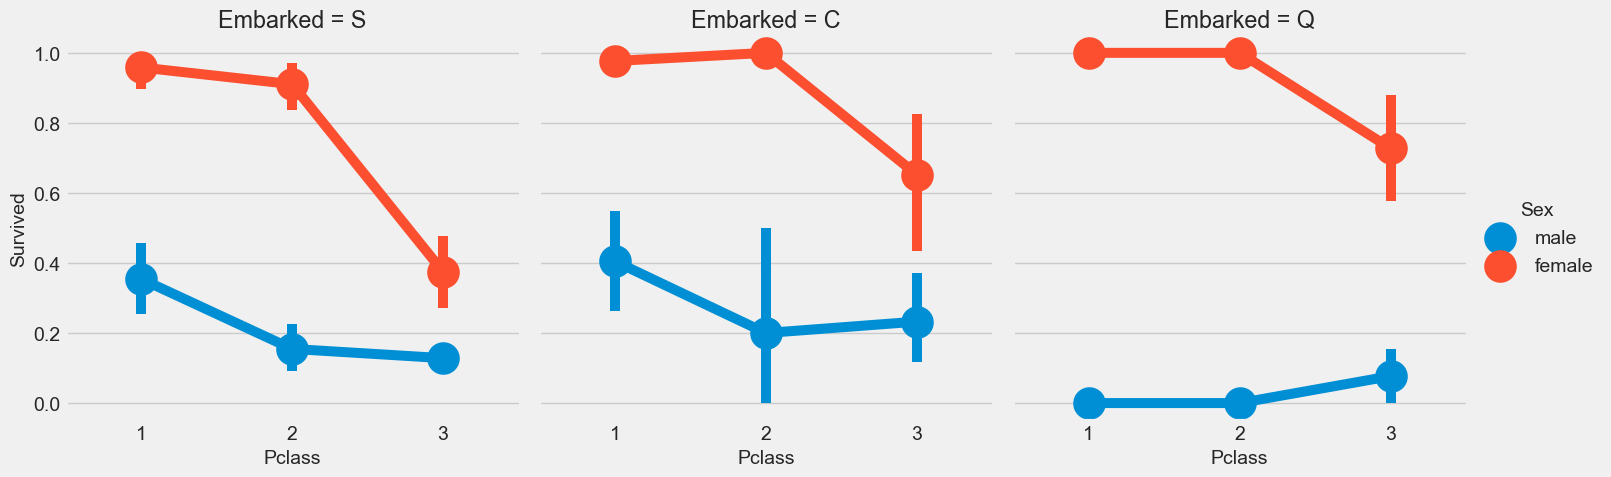

In [70]:
# 승선한 항구별 객실 등급에 따른 생존율
sns.catplot(x='Pclass', y='Survived', col='Embarked', data=data, hue='Sex',kind='point')

### 1. 1,2등급의 여성 생존 확률은 객실등급에 상관없이 거의 1에 가까움
### 2. 항구 S의 경우 3등급 승객의 생존율이 매우 낮음
### 3. 항구 Q의 경우 남성의 생존율이 매우 낮음

# <span style="color:orange"> 시간관계상 여기까지만 작성했습니다. 이번주 고생 많으셨습니다!! </span>